# Import Dependencies

In [110]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Dataset Loading

### Event Data Frame

In [21]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/event")
event_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
    )
event_df.head(3)

,match_id,first_to_serve,home_team_seed,away_team_seed,custom_id,winner_code,default_period_count,start_datetime,match_slug,final_result_only
0,11673958,None,1,4,JgdbspFNb,2,3,1696094700,tirante-barrios-vera,False
1,11673962,None,4,None,pFNbsHbwc,1,3,1696176000,heide-tirante,False
2,11673963,None,None,None,fTxsHbwc,1,3,1696087800,heide-jorda-sanchis,False


In [26]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   match_id              764 non-null    int64 
 1   first_to_serve        209 non-null    object
 2   home_team_seed        393 non-null    object
 3   away_team_seed        392 non-null    object
 4   custom_id             764 non-null    object
 5   winner_code           757 non-null    object
 6   default_period_count  764 non-null    int64 
 7   start_datetime        764 non-null    int64 
 8   match_slug            764 non-null    object
 9   final_result_only     764 non-null    bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 54.6+ KB


### Vote Data Frame

In [22]:
data_dir = Path("tennis_data_20231212/raw_votes_parquet")
vote_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
vote_df.head(3)

,match_id,home_vote,away_vote
0,11673958,554,233
1,11673962,909,213
2,11673963,399,213


In [27]:
vote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   match_id   764 non-null    int64
 1   home_vote  764 non-null    int64
 2   away_vote  764 non-null    int64
dtypes: int64(3)
memory usage: 18.0 KB


### Tournament Data Frame

In [28]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/tournament")
tournament_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
tournament_df.head(3)

,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
0,11673958,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
1,11673962,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2
2,11673963,121441,"Bogota, Colombia",bogota-colombia,None,Challenger,challenger,125,Red clay,125,False,False,False,False,0,2


In [29]:
tournament_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   match_id                         764 non-null    int64 
 1   tournament_id                    764 non-null    int64 
 2   tournament_name                  764 non-null    object
 3   tournament_slug                  764 non-null    object
 4   tournament_unique_id             0 non-null      object
 5   tournament_category_name         764 non-null    object
 6   tournament_category_slug         764 non-null    object
 7   user_count                       764 non-null    int64 
 8   ground_type                      747 non-null    object
 9   tennis_points                    164 non-null    object
 10  has_event_player_statistics      764 non-null    bool  
 11  crowd_sourcing_enabled           764 non-null    bool  
 12  has_performance_graph_feature    764

### Season Data Frame

In [30]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/season")
season_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
season_df.head(3)

,match_id,season_id,name,year
0,11673958,52736,"ATP Challenger Bogota, Colombia Men Singles 2023",2023
1,11673962,52736,"ATP Challenger Bogota, Colombia Men Singles 2023",2023
2,11673963,52736,"ATP Challenger Bogota, Colombia Men Singles 2023",2023


In [31]:
season_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   match_id   764 non-null    int64 
 1   season_id  764 non-null    int64 
 2   name       764 non-null    object
 3   year       764 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.0+ KB


### Round Data Frame

In [32]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/round")
round_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
round_df.head(3)

,match_id,round_id,name,slug,cup_round_type
0,11673958,28,Semifinal,semifinal,2
1,11673962,29,Final,final,1
2,11673963,28,Semifinal,semifinal,2


In [33]:
round_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   match_id        177 non-null    int64 
 1   round_id        177 non-null    int64 
 2   name            177 non-null    object
 3   slug            177 non-null    object
 4   cup_round_type  69 non-null     object
dtypes: int64(2), object(3)
memory usage: 7.0+ KB


### Venue Data Frame

In [34]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/venue")
venue_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
venue_df.head(3)

,match_id,city,stadium,venue_id,country
0,11673958,Bogota,Cancha Central,18338,Colombia
1,11673962,Bogota,Cancha Central,18338,Colombia
2,11673963,Bogota,Cancha Central,18338,Colombia


In [35]:
venue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   match_id  763 non-null    int64 
 1   city      763 non-null    object
 2   stadium   763 non-null    object
 3   venue_id  763 non-null    int64 
 4   country   762 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.9+ KB


### Home Team Data Frame

In [36]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/home")
home_team_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
home_team_df.head(3)

C:\Users\amine\AppData\Local\Temp\ipykernel_11900\2939222363.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  home_team_df = pd.concat(


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Barrios Vera T.,barrios-vera-tomas,M,2915,Santiago,"Chillan, Chile",1.91,83,right-handed,2014,265608,646273,132834,103,BAR,Chile,"Barrios Vera, Tomás"
1,11673962,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78,right-handed,None,249335,430793,221515,123,TIR,Argentina,"Tirante, Thiago Agustin"
2,11673963,Heide G.,heide-gustavo,M,1177,None,Sao Paulo,1.88,None,right-handed,None,36929,87230,302582,247,HEI,Brazil,"Heide, Gustavo"


In [37]:
home_team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       436 non-null    int64  
 1   name           436 non-null    object 
 2   slug           436 non-null    object 
 3   gender         436 non-null    object 
 4   user_count     436 non-null    int64  
 5   residence      112 non-null    object 
 6   birthplace     245 non-null    object 
 7   height         237 non-null    float64
 8   weight         112 non-null    object 
 9   plays          181 non-null    object 
 10  turned_pro     65 non-null     object 
 11  current_prize  427 non-null    object 
 12  total_prize    432 non-null    object 
 13  player_id      436 non-null    int64  
 14  current_rank   430 non-null    object 
 15  name_code      436 non-null    object 
 16  country        435 non-null    object 
 17  full_name      436 non-null    object 
dtypes: float64

### Away Team Data Frame

In [38]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/away")
away_team_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
away_team_df.head(3)

C:\Users\amine\AppData\Local\Temp\ipykernel_11900\2063714720.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  away_team_df = pd.concat(


,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,11673958,Tirante T.,tirante-thiago-agustin,M,1519,La Plata,"La Plata, Argentina",1.85,78,right-handed,None,249335,430793,221515,123,TIR,Argentina,"Tirante, Thiago Agustin"
1,11673962,Heide G.,heide-gustavo,M,1177,None,Sao Paulo,1.88,None,right-handed,None,36929,87230,302582,247,HEI,Brazil,"Heide, Gustavo"
2,11673963,Jorda Sanchis D.,jorda-sanchis-david,M,344,Spain,"Barcelona, Spain",1.98,83,right-handed,None,27028,72338,57155,331,JOR,Spain,"Jorda Sanchis, David"


In [39]:
away_team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   match_id       386 non-null    int64  
 1   name           386 non-null    object 
 2   slug           386 non-null    object 
 3   gender         386 non-null    object 
 4   user_count     386 non-null    int64  
 5   residence      116 non-null    object 
 6   birthplace     219 non-null    object 
 7   height         215 non-null    float64
 8   weight         113 non-null    object 
 9   plays          177 non-null    object 
 10  turned_pro     71 non-null     object 
 11  current_prize  374 non-null    object 
 12  total_prize    383 non-null    object 
 13  player_id      386 non-null    int64  
 14  current_rank   368 non-null    object 
 15  name_code      386 non-null    object 
 16  country        385 non-null    object 
 17  full_name      386 non-null    object 
dtypes: float64

### Home Team Score Data Frame

In [40]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/home_score")
home_score_df = pd.concat(
   (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
home_score_df.head(3)

,match_id,current_score,display_score,period_1,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11673958,0,0,2,4,None,None,None,None,None,None,None,None,None
1,11673962,None,None,None,None,None,None,None,None,None,None,None,None,None
2,11673963,2,2,7,6,None,None,None,None,None,None,None,None,None


In [41]:
home_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            764 non-null    int64 
 1   current_score       739 non-null    object
 2   display_score       739 non-null    object
 3   period_1            746 non-null    object
 4   period_2            740 non-null    object
 5   period_3            181 non-null    object
 6   period_4            0 non-null      object
 7   period_5            0 non-null      object
 8   period_1_tie_break  17 non-null     object
 9   period_2_tie_break  20 non-null     object
 10  period_3_tie_break  4 non-null      object
 11  period_4_tie_break  0 non-null      object
 12  period_5_tie_break  0 non-null      object
 13  normal_time         0 non-null      object
dtypes: int64(1), object(13)
memory usage: 83.7+ KB


### Away Team Score Data Frame

In [43]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/away_score")
away_score_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
away_score_df.head(3)

,match_id,current_score,display_score,period_1,period_2,period_3,period_4,period_5,period_1_tie_break,period_2_tie_break,period_3_tie_break,period_4_tie_break,period_5_tie_break,normal_time
0,11673958,2,2,6,6,None,None,None,None,None,None,None,None,None
1,11673962,None,None,None,None,None,None,None,None,None,None,None,None,None
2,11673963,0,0,6,4,None,None,None,None,None,None,None,None,None


In [44]:
away_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   match_id            764 non-null    int64 
 1   current_score       739 non-null    object
 2   display_score       739 non-null    object
 3   period_1            746 non-null    object
 4   period_2            740 non-null    object
 5   period_3            181 non-null    object
 6   period_4            0 non-null      object
 7   period_5            0 non-null      object
 8   period_1_tie_break  17 non-null     object
 9   period_2_tie_break  20 non-null     object
 10  period_3_tie_break  4 non-null      object
 11  period_4_tie_break  0 non-null      object
 12  period_5_tie_break  0 non-null      object
 13  normal_time         0 non-null      object
dtypes: int64(1), object(13)
memory usage: 83.7+ KB


### Time Data Frame

In [135]:
data_dir = Path("tennis_data_20231212/raw_match_parquet/time")
time_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
time_df.head(3)

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp
0,11673958,1960,2457,None,None,None,1696097817
1,11673962,None,None,None,None,None,1696176527
2,11673963,3403,2431,None,None,None,1696091852


In [46]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   match_id                        764 non-null    int64 
 1   period_1                        320 non-null    object
 2   period_2                        319 non-null    object
 3   period_3                        107 non-null    object
 4   period_4                        0 non-null      object
 5   period_5                        0 non-null      object
 6   current_period_start_timestamp  329 non-null    object
dtypes: int64(1), object(6)
memory usage: 41.9+ KB


### Odds Data Frame

In [47]:
data_dir = Path("tennis_data_20231212/raw_odds_parquet")
odds_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
odds_df.head(3)

,match_id,market_id,market_name,is_live,suspended,initial_fractional_value,fractional_value,choice_name,choice_source_id,winnig,change
0,11673958,1,full_time,False,False,73/100,83/100,1,1349454568,False,1
1,11673958,1,full_time,False,False,1/1,83/100,2,1349454681,True,-1
2,11673958,11,first_set_winner,False,False,8/11,5/6,1,1349620691,False,1


In [48]:
odds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   match_id                  848 non-null    int64 
 1   market_id                 848 non-null    int64 
 2   market_name               848 non-null    object
 3   is_live                   848 non-null    bool  
 4   suspended                 848 non-null    bool  
 5   initial_fractional_value  848 non-null    object
 6   fractional_value          848 non-null    object
 7   choice_name               848 non-null    object
 8   choice_source_id          848 non-null    int64 
 9   winnig                    836 non-null    object
 10  change                    848 non-null    int64 
dtypes: bool(2), int64(4), object(5)
memory usage: 61.4+ KB


### Tennis Power Data Frame

In [49]:
data_dir = Path("tennis_data_20231212/raw_tennis_power_parquet")
tennis_power_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
tennis_power_df.head(3)

,match_id,set_num,game_num,value,break_occurred
0,11674074,1,1,30.5,False
1,11674074,1,2,81.1,True
2,11674074,1,3,51.6,False


In [50]:
tennis_power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   match_id        3476 non-null   int64  
 1   set_num         3476 non-null   int64  
 2   game_num        3476 non-null   int64  
 3   value           3476 non-null   float64
 4   break_occurred  3476 non-null   bool   
dtypes: bool(1), float64(1), int64(3)
memory usage: 112.1 KB


### Point by Point Data Frame

In [51]:
data_dir = Path("tennis_data_20231212/raw_point_by_point_parquet")
point_by_point_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
point_by_point_df.head(3)

,match_id,set_id,game_id,point_id,home_point,away_point,point_description,home_point_type,away_point_type,home_score,away_score,serving,scoring
0,11674074,2,7,0,0,15,2,5,1,6,1,1,1
1,11674074,2,7,1,0,30,0,5,1,6,1,1,1
2,11674074,2,7,2,15,30,1,1,5,6,1,1,1


In [52]:
point_by_point_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22880 entries, 0 to 22879
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           22880 non-null  int64 
 1   set_id             22880 non-null  int64 
 2   game_id            22880 non-null  int64 
 3   point_id           22880 non-null  int64 
 4   home_point         22880 non-null  object
 5   away_point         22880 non-null  object
 6   point_description  22880 non-null  int64 
 7   home_point_type    22880 non-null  int64 
 8   away_point_type    22880 non-null  int64 
 9   home_score         22880 non-null  int64 
 10  away_score         22880 non-null  int64 
 11  serving            22880 non-null  int64 
 12  scoring            22880 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 2.3+ MB


### Statistics Data Frame

In [53]:
data_dir = Path("tennis_data_20231212/raw_statistics_parquet")
statistics_df = pd.concat(
    (pd.read_parquet(parquet_file) for parquet_file in data_dir.glob('*.parquet')), ignore_index=True
)
statistics_df.head(3)

,match_id,period,statistic_category_name,statistic_name,home_stat,away_stat,compare_code,statistic_type,value_type,home_value,away_value,home_total,away_total
0,11674074,ALL,service,aces,1,2,2,positive,event,1,2,NaN,NaN
1,11674074,ALL,service,double_faults,1,3,2,negative,event,1,3,NaN,NaN
2,11674074,ALL,service,first_serve,34/52 (65%),26/57 (46%),1,positive,team,34,26,52.0,57.0


In [54]:
statistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12263 entries, 0 to 12262
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   match_id                 12263 non-null  int64  
 1   period                   12263 non-null  object 
 2   statistic_category_name  12263 non-null  object 
 3   statistic_name           12263 non-null  object 
 4   home_stat                12263 non-null  object 
 5   away_stat                12263 non-null  object 
 6   compare_code             12263 non-null  int64  
 7   statistic_type           12263 non-null  object 
 8   value_type               12263 non-null  object 
 9   home_value               12263 non-null  int64  
 10  away_value               12263 non-null  int64  
 11  home_total               4837 non-null   float64
 12  away_total               4837 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.2+ MB


#### Q1: How many tennis players are included in the dataset?

In [57]:
total_players = pd.concat([home_team_df["player_id"], away_team_df["player_id"]]).unique().shape[0]
print(f"There are {total_players} players in dataset.")

There are 596 players in dataset.


#### Q2: What is the average age of the players? 
There is no way to find age of plyers with this information, so Mr. Ghaderi changed the question to average year of becoming pro.

In [61]:
away_team_int = away_team_df[~away_team_df["turned_pro"].isna()]["turned_pro"].astype(int)
home_team_int = home_team_df[~home_team_df["turned_pro"].isna()]["turned_pro"].astype(int)
become_professional_mean = int(pd.concat([home_team_int, away_team_int]).mean())
print(f"The average year of becoming professional is: {become_professional_mean}")

The average year of becoming professional is: 2012


#### Q3: Which player has the highest number of wins?

In [83]:
home_winner = event_df[event_df["winner_code"] == 1]["match_id"]
away_winner = event_df[event_df["winner_code"] == 2]["match_id"]

home_winner_names = pd.merge(home_team_df[["match_id", "full_name"]], home_winner)
away_winner_names = pd.merge(away_team_df[["match_id", "full_name"]], away_winner)

total_winners = pd.merge(home_winner_names, away_winner_names, how="outer")
total_winners.duplicated().sum()

total_winners = total_winners.groupby("full_name").agg(number_of_wins = 
                                       ("full_name","count")).sort_values("number_of_wins", ascending=False).reset_index().head()
total_winners

,full_name,number_of_wins
0,"Milushev, Plamen",3
1,"Panaras, Adam",3
2,"Kalina, Vit",3
3,"Mouilleron Salvo, Manuel",2
4,"Fery, Arthur",2


At first find home and away winner codes from event df, then merge them to home_team_df and away_team_df to find their names. At the end group them by their names, count and sort them to find answer. There are 3 players with at the top of list.

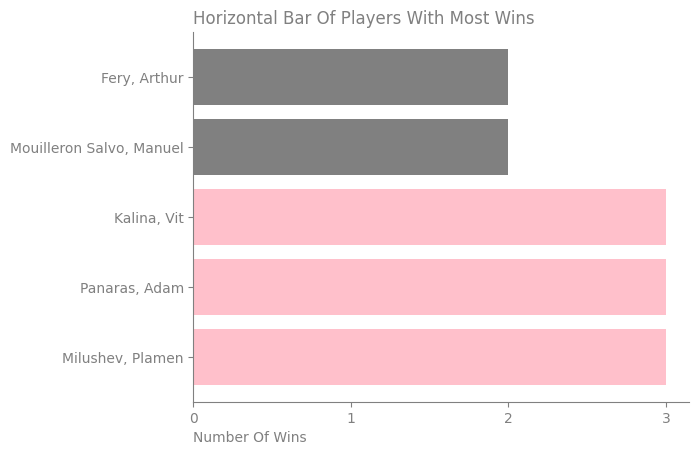

In [167]:
ax = plt.subplot()
clrs = ["gray" if (x < max(total_winners["number_of_wins"])) else "pink" for x in total_winners["number_of_wins"]]
ax.barh(total_winners["full_name"], total_winners["number_of_wins"], color=clrs)
ax.set_title("Horizontal Bar Of Players With Most Wins", loc="left", color="gray")
ax.set_xlabel("Number Of Wins", loc="left", color="gray")
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

#### Q4: What is the longest match recorded in terms of duration?

At first sum_of_durations column was added to time_df table that is sum of all match periods. Then was sorted based on this new colum. Five longest matches was shown in the horizontal bar plot, the longest matches the pink one.

In [169]:
time_df["sum_of_durations"] = (time_df["period_1"].fillna(0) + time_df["period_2"].fillna(0) + time_df["period_3"].fillna(0) +
                            time_df["period_4"].fillna(0) + time_df["period_5"].fillna(0))
longest_matches = time_df[["match_id","sum_of_durations"]].sort_values("sum_of_durations", ascending=False).head(5)

longest_matches


,match_id,sum_of_durations
331,11699235,12835
39,11697113,11123
300,11699173,11060
36,11697108,10795
24,11675448,10650


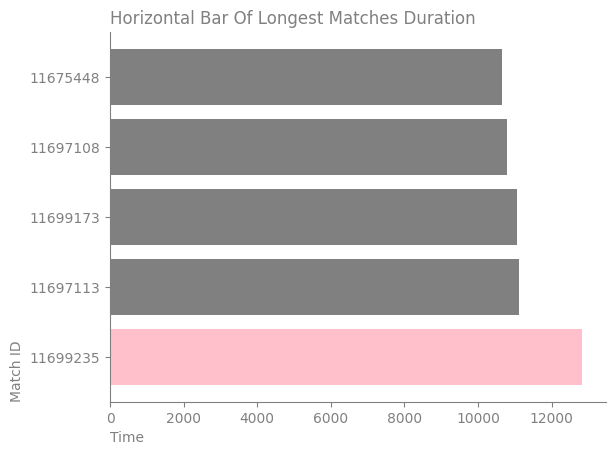

In [170]:
longest_matches_str = longest_matches
longest_matches_str["match_id"] = longest_matches_str["match_id"].astype(str)

ax = plt.subplot()
clrs = ["grey" if (x < max(longest_matches_str["sum_of_durations"])) else "pink" for x in longest_matches_str["sum_of_durations"] ]
ax.barh(longest_matches_str["match_id"], longest_matches_str["sum_of_durations"] , color=clrs)
ax.set_title("Horizontal Bar Of Longest Matches Duration", loc="left", color="gray")
ax.set_xlabel("Time", loc="left", color="gray")
ax.set_ylabel("Match ID", loc="bottom", color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.show()

In [50]:
# Q5 How many sets are typically played in a tennis match?
mean_set_per_match = home_score_df[[ "period_1", "period_2", "period_3", "period_4", "period_5"]].notnull().sum(axis=1).mean().round(2)
mean_set_per_match

2.18

In [84]:
# Q6 Which country has produced the most successful tennis players?
home_team_df[["current_rank", "country"]].isna().sum()
away_team_df[["current_rank", "country"]].isna().sum()
players_rank_country = pd.merge(home_team_df[["slug","current_rank", "country"]], away_team_df[["slug","current_rank", "country"]], how="outer")

#cleaning data
players_rank_country.duplicated().sum() #167 duplicated
players_rank_country = players_rank_country.drop_duplicates() #drop duplicates
players_rank_country.isna().sum() # 20 nan values
players_rank_country = players_rank_country.dropna().reset_index(drop=True).sort_values("current_rank") # drop nan values
players_rank_country.head()

,slug,current_rank,country
367,swiatek-iga,1,Poland
32,sabalenka-aryna,2,Belarus
19,alcaraz-carlos,2,Spain
365,gauff-cori,3,USA
348,medvedev-daniil,3,Russia


In [40]:
# Q7 What is the average number of aces per match?
statistics_aces_df = statistics_df[(statistics_df["period"] == "ALL") & (statistics_df["statistic_name"] == "aces")]
statistics_aces_df["total_aces"] = statistics_aces_df["home_value"] + statistics_aces_df["away_value"]
statistics_aces_df["total_aces"].mean().round(2)

C:\Users\amine\AppData\Local\Temp\ipykernel_12548\3489759979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_aces_df["total_aces"] = statistics_aces_df["home_value"] + statistics_aces_df["away_value"]


4.01

In [16]:
# Q8 Is there a difference in the number of double faults based on gender?
statistics_double_faults_df = statistics_df[(statistics_df["period"] == "ALL") & 
                                            (statistics_df["statistic_name"] == "double_faults")] #

statistics_double_faults_df["total_double_faults"] =  (statistics_double_faults_df["home_value"] + 
                                                       statistics_double_faults_df["away_value"]) #total fault per match

total_double_faults_df = statistics_double_faults_df[["match_id", "total_double_faults"]]


total_players = pd.merge(away_team_df[["match_id","gender"]], home_team_df[["match_id","gender"]], how="outer") # merge to have all players
total_players.duplicated().sum() # no duplicated

double_faults_average_per_match_based_gender = pd.merge(total_double_faults_df, total_players).groupby(
    "gender").agg(double_faults_average_per_match=("total_double_faults","mean")).round(2) 
double_faults_average_per_match_based_gender 

C:\Users\amine\AppData\Local\Temp\ipykernel_11900\3986531421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statistics_double_faults_df["total_double_faults"] =  (statistics_double_faults_df["home_value"] +


,double_faults_average_per_match
gender,
F,7.56
M,5.34


In [161]:
# Q9 Which player has won the most tournaments in a single month?
final_matches_id = round_df[round_df["slug"] == "final"][["match_id","slug"]] #which match is final
final_winners_and_dates = pd.merge(final_matches_id,event_df)[["match_id","winner_code","start_datetime"]]
final_winners_and_dates["start_datetime"] = pd.to_datetime(
    final_winners_and_dates["start_datetime"], unit='s').dt.to_period('M') # month of final

home_winner = final_winners_and_dates[final_winners_and_dates["winner_code"] == 1] # home winner
away_winner = final_winners_and_dates[final_winners_and_dates["winner_code"] == 2] # away winner
home_winner_player_names = pd.merge(home_winner["match_id"], home_team_df)[["match_id","full_name"]] # home winner name
away_winner_player_names = pd.merge(away_winner["match_id"], away_team_df)[["match_id","full_name"]] # away winner name

total_winners_name = pd.merge(pd.merge(home_winner, home_winner_player_names),
                               pd.merge(away_winner, away_winner_player_names), how="outer")
winner_names_of_tournaments_in_month = total_winners_name.groupby(["start_datetime", "full_name"]).agg(
    number_of_tournaments_of_win=("full_name","count")).sort_values("number_of_tournaments_of_win", ascending=False).head()

winner_names_of_tournaments_in_month
# because we have just one month and all of players won just one tournament, if we have more than one month we could select max of each group means each month. it was possible with find max id(idxmax()) and then df.loc[idxmax()].

number_of_tournaments_of_win
start_datetime full_name                                            
2023-10        Bartunkova, Nikola                                  1
               Biolay, Sophia                                      1
               Tirante, Thiago Agustin                             1
               Tabur, Clement                                      1
               Shelbayh, Abedallah                                 1

In [43]:
# Q10 Is there a correlation between a player's height and their ranking?
total_players = pd.merge(home_team_df[["slug", "gender", "height", "current_rank"]], away_team_df[["slug", "gender", "height", "current_rank"]], how="outer")
# data cleaning - duplicated
total_players.duplicated().sum() # there are 167 duplicated rows
total_players = total_players.drop_duplicates().reset_index(drop=True) # remove duplicates and reset index

total_female_players = total_players[total_players["gender"] == "F"]  # female df
total_male_players = total_players[total_players["gender"] == "M"] # male df

# data cleaning - drop nan
total_male_players[total_male_players.isna().any(axis=1)] #75 nan in height
total_female_players[total_female_players.isna().any(axis=1)] #182 nan in height
total_male_players[total_male_players["current_rank"].isna()] #3 nan in rank
total_male_players = total_male_players.dropna(subset=["current_rank"]) #remove nan current rank
total_female_players[total_female_players["current_rank"].isna()] # 15 nan in rank
total_female_players = total_female_players.dropna(subset=["current_rank"]) #remove nan current rank
total_female_players["height"] = total_female_players["height"].fillna(total_female_players["height"].mean().round(2)) # fill nan height with mean
total_male_players["height"] = total_male_players["height"].fillna(total_male_players["height"].mean().round(2)) # fill nan height with mean

# find correlations
print("Male correlation between height ang rank: ",total_male_players["height"].corr(total_male_players["current_rank"]))
print("Female correlation between height ang rank: ",total_female_players["height"].corr(total_female_players["current_rank"]))

Male correlation between height ang rank:  -0.11480808221589986
Female correlation between height ang rank:  -0.05487203884108093


In [44]:
# Q11 What is the average duration of matches?
time_df["sum_of_durations"] = (time_df["period_1"].fillna(0) + time_df["period_2"].fillna(0) + time_df["period_3"].fillna(0) +
                            time_df["period_4"].fillna(0) + time_df["period_5"].fillna(0)) # sum all durations 
print(f"The average duration of matches is {np.divide(time_df["sum_of_durations"].mean(),60).round(2)} minutes.")


The average duration of matches is 42.05 minutes.


In [45]:
# Q12 What is the average number of games per set in men's matches compared to women's matches?
match_game_num = tennis_power_df[["match_id","set_num"]].groupby(["match_id","set_num"]).agg(games=("set_num","count")) # find games per set
total_players = pd.merge(home_team_df[["match_id", "gender"]], away_team_df[["match_id", "gender"]], how="outer") # find all players
total_players = pd.merge(match_game_num, total_players, on="match_id") #find gender of player per match 

sum_of_male_games = total_players[total_players["gender"] == "M"]["games"].sum()
sum_of_male_sets = total_players[total_players["gender"] == "M"]["games"].count()
male_games_per_set = np.divide(sum_of_male_games, sum_of_male_sets).round(2)
print(f"Average games per sets for male is: {male_games_per_set}")

sum_of_female_games = total_players[total_players["gender"] == "F"]["games"].sum()
sum_of_female_sets = total_players[total_players["gender"] == "F"]["games"].count()
female_games_per_set = np.divide(sum_of_female_games, sum_of_female_sets).round(2)
print(f"Average games per sets for female is: {female_games_per_set}")


Average games per sets for male is: 9.12
Average games per sets for female is: 8.79


In [46]:
# Q13 What is the distribution of left-handed versus right-handed players?
left_right_hand_df = pd.merge(home_team_df[["slug","gender","plays"]],
                              away_team_df[["slug","gender","plays"]], how="outer")

# data cleaning
left_right_hand_df.duplicated().sum() # no duplicated
left_right_hand_df.isna().sum() #464
left_right_hand_df = left_right_hand_df.dropna().reset_index(drop=True) # remove nan plays

left_right_hand_df = left_right_hand_df.groupby("plays").agg(number_of_players=("plays","count"))
left_right_hand_df["percent_of_total"] = np.multiply(np.divide(left_right_hand_df["number_of_players"] ,
                                                     left_right_hand_df["number_of_players"].sum()).round(2), 100)
left_right_hand_df


,number_of_players,percent_of_total
plays,,
left-handed,44,13.0
right-handed,292,87.0


In [47]:
# Q14 What is the most common type of surface used in tournaments?
tournament_df["ground_type"].isna().sum() #17 nan
tournament_df.dropna(subset=["ground_type"], inplace=True)

# tournament_df["ground_type"].groupby("ground_type").agg(most_common_ground=("ground_type","count"))
tournament_df.groupby("ground_type").agg(most_common_ground=("ground_type","count")).sort_values(
    "most_common_ground",ascending=False)

,most_common_ground
ground_type,
Hardcourt outdoor,336
Red clay,323
Hardcourt indoor,84
Carpet indoor,3
Synthetic outdoor,1


In [83]:
# Q15 How many distinct countries are represented in the dataset?
# countries in tournament df
tournament_country_df = tournament_df.loc[tournament_df["tournament_slug"].str.len() < 20]
tournament_country_df = tournament_country_df["tournament_slug"].str.split('-').str[-1].unique()

# countries in home team df
home_birth_place_country = home_team_df.loc[home_team_df["birthplace"].str.len() > 10]
home_birth_place_country = home_birth_place_country["birthplace"].str.split(',').str[-1].unique()

home_country = home_team_df["country"].dropna().unique()

# countries in away team df
away_birth_place_country = away_team_df.loc[away_team_df["birthplace"].str.len() > 10]
away_birth_place_country = away_birth_place_country["birthplace"].str.split(',').str[-1].unique()

away_country = away_team_df["country"].dropna().unique()


# countries in venue df
venue_country = venue_df["country"].dropna().unique()

all_countries_dataset = np.concatenate((tournament_country_df, home_birth_place_country, home_country,
          away_birth_place_country, away_country, venue_country))
all_countries_dataset =list(map(str.strip, all_countries_dataset))
all_countries_dataset = list(map(str.lower,all_countries_dataset))
len(set(all_countries_dataset))

110

In [131]:
# Q16 Which player has the highest winning percentage against top 10 ranked opponents?
players_rank = pd.merge(home_team_df[["player_id","slug","current_rank"]], away_team_df[["player_id","slug","current_rank"]], how="outer").sort_values("current_rank")
# data cleaning
players_rank.duplicated().sum() #167 duplicated
players_rank = players_rank.drop_duplicates()
players_rank.isna().sum()
players_rank = players_rank.dropna().reset_index(drop=True)

top_10_players = players_rank.head(10) # top 10 ranked

top_10_home = pd.merge(home_team_df[["match_id","slug","player_id" ]], top_10_players) #top 10 matches
top_10_away = pd.merge(away_team_df[["match_id","slug","player_id" ]], top_10_players) #top 10 matches

top_10_home_matches = pd.merge(top_10_home, event_df[["match_id", "winner_code"]])
top_10_home_losses = top_10_home_matches.loc[top_10_home_matches["winner_code"] == 2] #in which matches home top 10 losses
top_10_away_matches = pd.merge(top_10_away, event_df[["match_id", "winner_code"]])
top_10_away_losses = top_10_away_matches.loc[top_10_away_matches["winner_code"] == 1] #in which matches away top 10 losses

top_10_winner_home_opponent = pd.merge(top_10_home_losses, away_team_df[["match_id","full_name"]], on="match_id") #who defeated home top 10 
top_10_winner_away_opponent = pd.merge(top_10_away_losses, home_team_df[["match_id","full_name"]], on="match_id") #who defeated away top 10 

number_of_wins_against_top10 = pd.merge(top_10_winner_home_opponent, top_10_winner_away_opponent, how="outer").groupby(
    "full_name").agg(number_of_wins_against_top10=("full_name","count")).sort_values(
        "number_of_wins_against_top10", ascending=False) #total numbers of wins against top 10
number_of_wins_against_top10

,number_of_wins_against_top10
full_name,
"Kudermetova, Veronika",1


In [116]:
home_team_df[home_team_df["match_id"] == 11674074]

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
10,11674074,Kudermetova V.,kudermetova-veronika,F,5894,"Moscow,Russia","Kazan,Russia",1.75,None,right-handed,2012,1347368,5445773,66968,19,KUD,Russia,"Kudermetova, Veronika"


In [116]:
# Q17 What is the average number of breaks of serve per match?
tennis_power_df[["match_id","break_occurred"]]
break_occurred_match = tennis_power_df.loc[tennis_power_df["break_occurred"] == True,
                                            ["match_id","break_occurred"]].reset_index(drop=True) # find where breaks occurred
break_occurred_match = break_occurred_match.groupby("match_id").agg(number_of_breaks=("break_occurred","count"))
average_number_of_break = np.mean(break_occurred_match["number_of_breaks"]).round(2)
print(f"Average number of breaks per match is: {average_number_of_break}")

Average number of breaks per match is: 7.2


In [85]:
# E1 How many wins each country has?
home_winner = event_df[event_df["winner_code"] == 1]["match_id"] #home winner code is 1
away_winner = event_df[event_df["winner_code"] == 2]["match_id"]
home_winner_names = pd.merge(home_team_df[["match_id", "full_name", "country"]], home_winner)
away_winner_names = pd.merge(away_team_df[["match_id", "full_name", "country"]], away_winner)
total_winners = pd.merge(home_winner_names, away_winner_names, how="outer")
total_winners.duplicated().sum() # nu duplicates
total_players.isna().sum() # no nan
total_winners.groupby("country").agg(number_of_winner_players=("country","count")).sort_values(
    "number_of_winner_players", ascending=False).head(5)

,number_of_winner_players
country,
France,55
Italy,39
Australia,30
Argentina,29
USA,27


In [130]:
# E2 In which month most matches ocurred? # we can find competition season
matches_date = event_df[["match_id","start_datetime"]]
matches_date["start_datetime"] = pd.to_datetime(matches_date["start_datetime"], unit='s').dt.to_period('M')
matches_date.groupby("start_datetime").agg(number_of_matches=("match_id","count")).sort_values("number_of_matches",ascending=False)

C:\Users\amine\AppData\Local\Temp\ipykernel_12548\2305681497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_date["start_datetime"] = pd.to_datetime(matches_date["start_datetime"], unit='s').dt.to_period('M')


,number_of_matches
start_datetime,
2023-10,742
2023-09,22


In [156]:
# E3 Which country has the most championships? 
final_matches_ids = round_df[round_df["slug"] == "final"]["match_id"]
final_winners = pd.merge(final_matches_ids,event_df)[["match_id","winner_code"]]

home_winners = final_winners[final_winners["winner_code"] == 1] # home winner
away_winners = final_winners[final_winners["winner_code"] == 2] # away winner

home_winner_country = pd.merge(home_winners["match_id"], home_team_df)[["match_id","country"]] # home winner name
away_winner_country = pd.merge(away_winners["match_id"], away_team_df)[["match_id","country"]] # away winner name

pd.merge(home_winner_country, away_winner_country, how="outer").groupby("country").agg(
    number_of_championships=("country","count")).sort_values("number_of_championships", ascending=False).head()

,number_of_championships
country,
France,4
Czech Republic,3
Spain,2
Argentina,1
Canada,1


In [182]:
# E4 Which country has the most presence in the finals?
final_match_ids = round_df[round_df["slug"] == "final"]["match_id"] #final match ids

home_countries_in_final = pd.merge(final_match_ids, home_team_df)["country"] #name of home countries in final
away_countries_in_final = pd.merge(final_match_ids, away_team_df)["country"] #name of away countries in final

pd.merge(home_countries_in_final, away_countries_in_final, how="outer").groupby("country").agg(
    number_of_presence_in_final=("country","count")).sort_values("number_of_presence_in_final", ascending=False).head()
                                                                                                                                                        

,number_of_presence_in_final
country,
France,4
USA,3
United Kingdom,3
Argentina,2
Croatia,2


In [215]:
# E5 Which counties held most tournaments?
tournament_countries_df = tournament_df.loc[tournament_df["tournament_slug"].str.len() < 20] # tournaments location
tournament_countries_df = tournament_countries_df["tournament_slug"].str.split('-').str[-1] # tournaments country
pd.DataFrame(tournament_countries_df, columns=["country"])#.groupby("tournament_slug").agg(new=("tournament_slug","count"))
tournament_countries_df.columns = ["a"]
tournament_countries_df = pd.DataFrame(tournament_countries_df).reset_index(drop=True)
tournament_countries_df.groupby("tournament_slug").agg(
    number_of_tournament=("tournament_slug","count")).sort_values("number_of_tournament", ascending=False).head()

,number_of_tournament
tournament_slug,
china,36
kazakhstan,7
colombia,3
france,3
usa,3


In [260]:
# E6 What percentage of the predictions were correct?
event_df[["match_id","winner_code"]]

event_vote_df = pd.merge(vote_df, event_df[["match_id","winner_code"]])
#cleaning
event_vote_df.isna().sum() #7 nan val in winner
event_vote_df = event_vote_df.dropna().reset_index(drop=True)

event_vote_df["vote_prediction"] = np.where(event_vote_df["home_vote"] > event_vote_df["away_vote"], 1, 2) # create vote_prediction based on votes
total_number_of_matches = event_vote_df["match_id"].count()
total_number_of_correct_prediction = event_vote_df.loc[
    event_vote_df["winner_code"] == event_vote_df["vote_prediction"]]["match_id"].count() # correct predictions

percentage_of_correct_predictions = np.multiply(np.divide(
    total_number_of_correct_prediction, total_number_of_matches), 100).round(2)

print(f"The correct percentage of predictions is {percentage_of_correct_predictions} %")


The correct percentage of predictions is 67.37 %


In [50]:
# Q7 Does the ranking of the players have an effect on the result?
event_df[["match_id","winner_code"]]
home_rank = home_team_df[["match_id","current_rank"]]
away_rank = away_team_df[["match_id","current_rank"]]
merge_home_event = pd.merge(event_df[["match_id","winner_code"]], home_rank, how="outer").rename(
    {"current_rank":"home_rank"}, axis="columns") #merge event with home rank

total_winner_ranks = pd.merge(merge_home_event, away_rank, how="outer").rename(
    {"current_rank":"away_rank"}, axis="columns")
#cleaning data
total_winner_ranks.duplicated().sum() # no duplicated
total_winner_ranks.isna().sum() # there are some nan values 
total_winner_ranks = total_winner_ranks.dropna().reset_index(drop=True)

total_winner_ranks["upper_rank"] = np.where(total_winner_ranks["home_rank"] > total_winner_ranks["away_rank"], 2, 1)
number_of_winner_based_their_rank = np.where(
    total_winner_ranks["winner_code"] == total_winner_ranks["upper_rank"])[0].shape[0] #number of winner based their rank
total_winner = total_winner_ranks.shape[0] # total winners 
winners_based_rank_percentage = np.multiply(np.divide(number_of_winner_based_their_rank, total_winner), 100).round(2)
print(f"In {winners_based_rank_percentage} % of matches, the result ocurred based on players rank.")

In 66.8 % of matches, the result ocurred based on players rank.
